In [7]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [8]:
def load (fname):
    th_data = np.zeros(400)
    ph_data = np.zeros(400)
    for line in open(fname).readlines():
        hpix = int (line[:line.find('.out')].replace('run',''))
        d = float(line.split()[-1])
        if hpix<400:
            th_data[hpix] = d
        else:
            ph_data[hpix-400] = d

    #hacks
    th_data[116]=th_data[115]
    th_data[178]=th_data[115]
    return th_data, ph_data

th_data,ph_data = load('heal_fit.txt')
th_data_low,ph_data_low = load('heal_fit_low.txt')

In [9]:
th_sim = []
ph_sim = []
for pixd in range(400):
    th_sim.append(np.load(f"data/healpix_calib/calib_hp{pixd}_t.beam.npy"))
    ph_sim.append(np.load(f"data/healpix_calib/calib_hp{pixd}_p.beam.npy"))
th_sim = np.array(th_sim)
ph_sim = np.array(ph_sim)

In [25]:
def project_up(hpf):
    N=400
    x=np.linspace(-1,1,N)
    y=np.linspace(-1,1,N)
    #img = np.zeros((N,N))
    r=np.sqrt(x[:,None]**2+y[None,:]**2)
    r[r>=1]=np.nan
    #theta = np.arcsin(r)
    theta = r*np.pi/2
    phi = np.arctan2(y[:,None],x[None,:])
    phi[phi<0]+=2*np.pi
    #phi=2*np.pi-phi
    theta[np.isnan(theta)] = 0
    print (theta.min(), theta.max())
    ndx = hp.ang2pix(8,theta,phi)
    img = hpf[ndx]
    img[np.isnan(r)] = np.nan
    return img


    
    
    

0.0 1.5706828550815026
0.0 1.5706828550815026
0.0 1.5706828550815026
0.0 1.5706828550815026
0.0 1.5706828550815026
0.0 1.5706828550815026


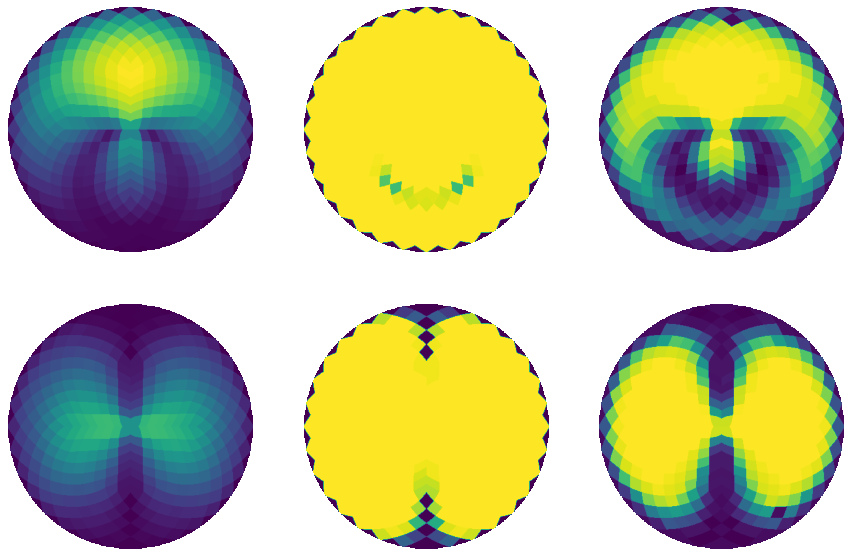

In [26]:

fig,ax=plt.subplots(2,3,figsize=(15,10))

ax[0][0].imshow(project_up(th_sim[:,30]),origin='lower',vmax=0.44)
ax[1][0].imshow(project_up(ph_sim[:,30]),origin='lower',vmax=0.44)
ax[0][1].imshow(project_up(-th_data),origin='lower')
ax[1][1].imshow(project_up(-ph_data),origin='lower')

ax[0][2].imshow(project_up(-th_data_low),origin='lower')
ax[1][2].imshow(project_up(-ph_data_low),origin='lower')

for a in ax:
    for b in a:
        b.axis('off')
plt.savefig('heal-all.pdf')

In [175]:
th_sim[:,30].max()

0.4388545802104326